In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('musk_csv.csv')

In [8]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [9]:
data.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [10]:
data.shape

(6598, 170)

In [11]:
data.dtypes

ID                    int64
molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
                      ...  
f163                  int64
f164                  int64
f165                  int64
f166                  int64
class                 int64
Length: 170, dtype: object

In [12]:
data['conformation_name'].value_counts()

j146_1+182    1
j146_3+187    1
252_2+293     1
j147_2+51     1
f146_1+184    1
             ..
jp13_2+27     1
330_2+3       1
j146_3+103    1
213_1+11      1
217_1+14      1
Name: conformation_name, Length: 6598, dtype: int64

In [13]:
pd.get_dummies(data['conformation_name']).head()

,192_1+1,192_1+10,192_1+100,192_1+101,192_1+102,192_1+103,192_1+104,192_1+105,192_1+106,192_1+107,...,jp13_2+29,jp13_2+3,jp13_2+30,jp13_2+31,jp13_2+4,jp13_2+5,jp13_2+6,jp13_2+7,jp13_2+8,jp13_2+9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data = data.drop(columns='molecule_name',inplace=False, axis = 1)

In [15]:
data = data.drop(columns='conformation_name',inplace=False, axis = 1)

In [16]:
data = data.drop(columns='ID',inplace=False, axis = 1)

In [17]:
data.isnull().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
        ..
f163     0
f164     0
f165     0
f166     0
class    0
Length: 167, dtype: int64

In [18]:
x = data.drop(['class'], axis=1)
y = data['class']
x.shape, y.shape

((6598, 166), (6598,))

In [19]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x,y,random_state = 169, stratify = y, test_size = 0.20)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
cols = train_x.columns
cols

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165',
       'f166'],
      dtype='object', length=166)

In [21]:
train_x_scaled = scalar.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns = cols)
train_x_scaled.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.244582,0.006849,0.068548,0.520000,0.002257,0.258486,0.608696,0.414679,0.573980,0.218569,...,0.042289,0.155875,0.022613,0.484756,0.516008,0.475177,0.208333,0.371575,0.427852,0.581146
1,0.216718,0.023973,0.250000,0.810909,0.002257,0.522193,0.974425,0.381651,0.558673,0.586074,...,0.072139,0.618705,0.321608,0.115854,0.485876,0.411348,0.282609,0.369863,0.354027,0.547733
2,0.114551,0.020548,0.088710,0.160000,0.011287,0.618799,0.580563,0.097248,0.522959,0.570600,...,0.049751,0.064748,0.701005,0.015244,0.299435,0.269504,0.639493,0.943493,0.984899,0.915274
3,0.984520,0.017123,0.088710,0.138182,0.002257,0.509138,0.583120,0.097248,0.522959,0.504836,...,0.052239,0.609113,0.228643,0.024390,0.000000,0.914894,0.257246,0.501712,0.946309,0.761337
4,0.253870,0.260274,0.580645,0.145455,0.002257,0.665796,0.028133,0.724771,0.165816,0.508704,...,0.024876,0.016787,0.660804,0.371951,0.169492,0.413712,0.177536,0.419521,0.523490,0.702864


In [22]:
valid_x_scaled = scalar.fit_transform(valid_x)
valid_x_scaled = pd.DataFrame(valid_x_scaled, columns = cols)
valid_x_scaled.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.226708,0.071429,0.543103,0.138060,0.000000,0.947644,0.005181,0.551064,0.136598,0.526316,...,0.052632,0.345972,0.637975,0.354938,0.476460,0.419811,0.160714,0.387324,0.440135,0.588542
1,0.236025,0.023810,0.094828,0.537313,0.000000,0.604712,0.564767,0.114894,0.510309,0.721248,...,0.042607,0.571090,0.511392,0.558642,0.504708,0.495283,0.132937,0.389085,0.468803,0.657552
2,0.782609,0.003401,0.228448,0.138060,0.000000,0.505236,0.505181,0.274468,0.569588,0.500975,...,0.045113,0.601896,0.222785,0.209877,0.998117,0.990566,0.007937,0.489437,0.553120,0.574219
3,0.186335,0.003401,0.000000,0.940299,0.002398,0.748691,0.031088,0.440426,0.072165,0.339181,...,0.040100,0.182464,0.017722,0.064815,0.453861,0.367925,0.337302,0.383803,0.279933,0.595052
4,0.242236,0.030612,0.103448,0.526119,0.000000,0.253927,0.582902,0.580851,0.829897,0.461988,...,0.042607,0.101896,0.017722,0.462963,0.517891,0.471698,0.178571,0.380282,0.424958,0.630208


In [23]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [24]:
logreg = LogReg()
logreg.fit(train_x, train_y)

C:\Users\Av\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [26]:
k = f1_score(train_predict, train_y)
print('Training f1_Score: ', k)

Training f1_Score:  0.8775510204081632


In [27]:
valid_predict = logreg.predict(valid_x)
k = f1_score(valid_predict, valid_y)
print('Validation f1_Score: ', k)

Validation f1_Score:  0.8385416666666667


In [28]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(valid_y, valid_predict)
print(cf)

[[1097   20]
 [  42  161]]


In [29]:
from sklearn.metrics import classification_report as rep
print(rep(valid_y, valid_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1117
           1       0.89      0.79      0.84       203

    accuracy                           0.95      1320
   macro avg       0.93      0.89      0.91      1320
weighted avg       0.95      0.95      0.95      1320



Text(0.5, 1.0, 'Coefficient Plot')

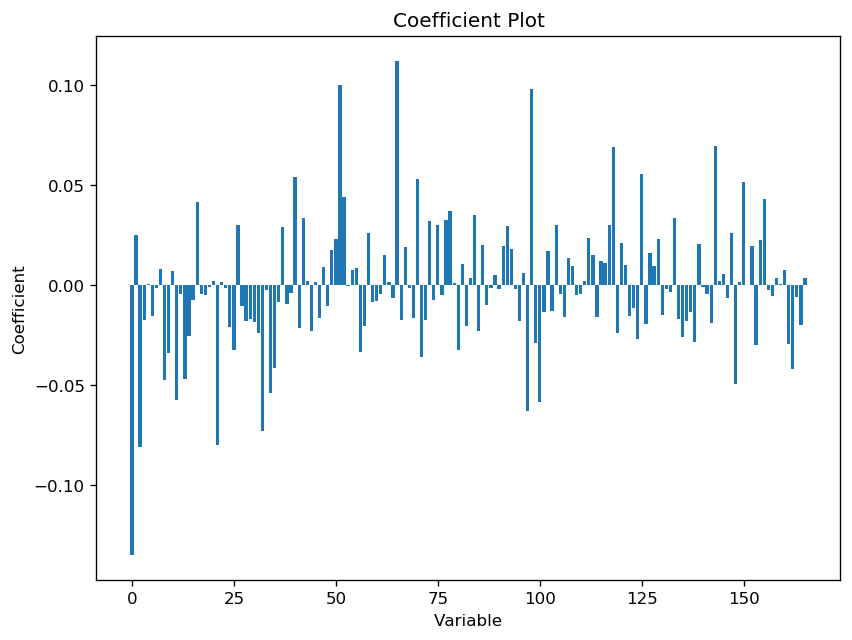

In [30]:
plt.figure(figsize=(8,6), dpi=120, facecolor='w', edgecolor='b')
x=range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar(x,c)
plt.xlabel("Variable")
plt.ylabel("Coefficient")
plt.title("Coefficient Plot")

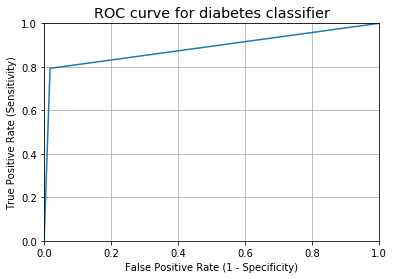

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(valid_y, valid_predict)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)



Text(0, 0.5, 'Frequency')

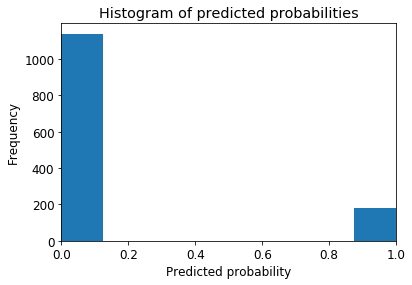

In [33]:
plt.hist(valid_predict, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [35]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(valid_y, valid_predict))

0.88759917266076
